In [1]:
# Thêm autoreload vào để tự động reload lại module nếu có thay đổi code trong module
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Các model scikit learn cho bài toán phân loại
from sklearn.svm import SVC # Support vector machine
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import os, sys
sys.path.append(os.path.abspath(".."))
from utils.common import load_model, save_model

### 1. Các thông tin về dữ liệu

In [2]:
train_df = pd.read_csv("train_clean.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2977 entries, 0 to 2976
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   label               2977 non-null   object 
 1   nose_x              2977 non-null   float64
 2   nose_y              2977 non-null   float64
 3   nose_z              2977 non-null   float64
 4   left_shoulder_x     2977 non-null   float64
 5   left_shoulder_y     2977 non-null   float64
 6   left_shoulder_z     2977 non-null   float64
 7   right_shoulder_x    2977 non-null   float64
 8   right_shoulder_y    2977 non-null   float64
 9   right_shoulder_z    2977 non-null   float64
 10  left_elbow_x        2977 non-null   float64
 11  left_elbow_y        2977 non-null   float64
 12  left_elbow_z        2977 non-null   float64
 13  right_elbow_x       2977 non-null   float64
 14  right_elbow_y       2977 non-null   float64
 15  right_elbow_z       2977 non-null   float64
 16  left_w

In [4]:
train_df.columns

Index(['label', 'nose_x', 'nose_y', 'nose_z', 'left_shoulder_x',
       'left_shoulder_y', 'left_shoulder_z', 'right_shoulder_x',
       'right_shoulder_y', 'right_shoulder_z', 'left_elbow_x', 'left_elbow_y',
       'left_elbow_z', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z',
       'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'right_wrist_x',
       'right_wrist_y', 'right_wrist_z', 'left_hip_x', 'left_hip_y',
       'left_hip_z', 'right_hip_x', 'right_hip_y', 'right_hip_z',
       'left_knee_x', 'left_knee_y', 'left_knee_z', 'right_knee_x',
       'right_knee_y', 'right_knee_z', 'left_ankle_x', 'left_ankle_y',
       'left_ankle_z', 'right_ankle_x', 'right_ankle_y', 'right_ankle_z',
       'left_heel_x', 'left_heel_y', 'left_heel_z', 'right_heel_x',
       'right_heel_y', 'right_heel_z', 'left_foot_index_x',
       'left_foot_index_y', 'left_foot_index_z', 'right_foot_index_x',
       'right_foot_index_y', 'right_foot_index_z'],
      dtype='object')

In [5]:
train_df.head()

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,C,0.213642,0.007156,-0.055131,0.151826,-0.035799,0.125803,0.154366,-0.007986,-0.187625,...,0.245712,-0.235022,0.039568,0.065375,-0.229869,0.121924,0.206447,-0.238722,0.123362,0.003764
1,C,0.222368,-0.071354,-0.070117,0.151103,-0.079363,0.100696,0.149426,-0.040178,-0.170662,...,0.266025,-0.232282,0.007561,0.100571,-0.224483,0.093258,0.233096,-0.237525,0.093753,0.048710
2,C,0.216170,-0.067472,-0.063832,0.144396,-0.059443,0.109028,0.144433,-0.036645,-0.163427,...,0.214913,-0.233871,0.011221,0.040485,-0.237365,0.087917,0.176753,-0.248834,0.088290,-0.018377
3,C,0.218257,-0.071693,-0.079761,0.145390,-0.058949,0.099756,0.144829,-0.039815,-0.179505,...,0.245903,-0.233383,0.013893,0.071552,-0.232242,0.087876,0.207229,-0.245439,0.088420,0.011916
4,C,0.219348,-0.067729,-0.081575,0.146637,-0.056749,0.097673,0.146361,-0.037216,-0.178930,...,0.240968,-0.229545,0.014394,0.078501,-0.233238,0.088282,0.203226,-0.244404,0.087259,0.021840


### 2. Training model

In [6]:
# Chuyển dữ liệu của label về dạng số
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

train_df["label"] = label_encoder.fit_transform(train_df["label"])

In [7]:
# Extract features
X = train_df.drop(columns="label")
y = train_df["label"]

In [8]:
X.head()

,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_elbow_x,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,0.213642,0.007156,-0.055131,0.151826,-0.035799,0.125803,0.154366,-0.007986,-0.187625,0.142400,...,0.245712,-0.235022,0.039568,0.065375,-0.229869,0.121924,0.206447,-0.238722,0.123362,0.003764
1,0.222368,-0.071354,-0.070117,0.151103,-0.079363,0.100696,0.149426,-0.040178,-0.170662,0.139137,...,0.266025,-0.232282,0.007561,0.100571,-0.224483,0.093258,0.233096,-0.237525,0.093753,0.048710
2,0.216170,-0.067472,-0.063832,0.144396,-0.059443,0.109028,0.144433,-0.036645,-0.163427,0.130698,...,0.214913,-0.233871,0.011221,0.040485,-0.237365,0.087917,0.176753,-0.248834,0.088290,-0.018377
3,0.218257,-0.071693,-0.079761,0.145390,-0.058949,0.099756,0.144829,-0.039815,-0.179505,0.131297,...,0.245903,-0.233383,0.013893,0.071552,-0.232242,0.087876,0.207229,-0.245439,0.088420,0.011916
4,0.219348,-0.067729,-0.081575,0.146637,-0.056749,0.097673,0.146361,-0.037216,-0.178930,0.135215,...,0.240968,-0.229545,0.014394,0.078501,-0.233238,0.088282,0.203226,-0.244404,0.087259,0.021840


In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2972    1
2973    1
2974    1
2975    1
2976    1
Name: label, Length: 2977, dtype: int32

In [10]:
# Phân chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_validation.shape

((2381, 51), (596, 51))

In [12]:
# Chuẩn hoá dữ liệu trên tập huấn luyện bằng z-scores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

In [13]:
# X lúc này là một DataFrame mới với các cột mới được đánh số từ 0 đến n-1, trong đó n là số lượng cột trong dữ liệu ban đầu
X_train

array([[ 0.5786973 ,  1.78890583, -0.5189494 , ..., -0.49822228,
         1.25817566,  0.59693696],
       [ 1.14371256, -1.1467774 , -0.71971981, ..., -0.81124965,
        -0.33470022,  0.1277297 ],
       [ 0.84353629,  1.05369287, -1.18883623, ..., -0.50262597,
        -0.71229372,  0.91123881],
       ...,
       [ 1.07541681, -0.27677366,  0.70566387, ..., -1.1870928 ,
        -0.40262452, -1.25898819],
       [ 1.03849322,  0.14115492,  0.99821593, ..., -1.14969763,
         1.07157679, -1.51595856],
       [-0.98741443,  0.36719387,  0.51911298, ...,  1.06826083,
        -0.47016182,  0.45386148]])

In [14]:
from sklearn.metrics import (
    precision_score,
    accuracy_score,
    f1_score,
    recall_score,
    confusion_matrix,
)

import warnings

warnings.filterwarnings("ignore")

In [15]:
def round_up_metric_results(results) -> list:
    """Thực hiện việc làm tròn các giá trị trong mảng"""
    return list(map(lambda el: round(el, 3), results))

In [16]:
def evaluate_model(name, model, final_results):
    # Đánh giá Model
    y_validation_pred = model.predict(X_validation)

    p_score = precision_score(y_validation, y_validation_pred, average=None, labels=[0, 1])
    a_score = accuracy_score(y_validation, y_validation_pred)
    r_score = recall_score(y_validation, y_validation_pred, average=None, labels=[0, 1])
    f1_score_result = f1_score(y_validation, y_validation_pred, average=None, labels=[0, 1])
    cm = confusion_matrix(y_validation, y_validation_pred, labels=[0, 1])
    
    final_results.append(
        (
            name,
            round_up_metric_results(p_score),
            a_score,
            round_up_metric_results(r_score),
            round_up_metric_results(f1_score_result),
            cm,
        )
    )

In [17]:
random_state_value = 42
algorithms = [
    ("LR", LogisticRegression(random_state=random_state_value)),
    ("SVC", SVC(probability=True, random_state=random_state_value)),
    ("KNN", KNeighborsClassifier()),
    ("DTC", DecisionTreeClassifier(random_state=random_state_value)),
    ("NB", GaussianNB()),
    ("RF", RandomForestClassifier(random_state=random_state_value)),
]

models = {}
final_results = []

for name, model in algorithms:
    trained_model = model.fit(X_train, y_train)
    models[name] = trained_model

    evaluate_model(name, model, final_results)

In [18]:
def print_results(final_results):
    # Sort results by F1 score
    final_results.sort(key=lambda k: sum(k[4]), reverse=True)

    return pd.DataFrame(
        final_results,
        columns=[
            "Model",
            "Precision Score",
            "Accuracy score",
            "Recall Score",
            "F1 score",
            "Confusion Matrix",
        ],
    )

print_results(final_results)

,Model,Precision Score,Accuracy score,Recall Score,F1 score,Confusion Matrix
0,RF,"[0.895, 0.903]",0.899329,"[0.901, 0.897]","[0.898, 0.9]","[[265, 29], [31, 271]]"
1,SVC,"[0.84, 0.943]",0.885906,"[0.949, 0.825]","[0.891, 0.88]","[[279, 15], [53, 249]]"
2,KNN,"[0.839, 0.912]",0.872483,"[0.918, 0.828]","[0.877, 0.868]","[[270, 24], [52, 250]]"
3,DTC,"[0.846, 0.845]",0.845638,"[0.84, 0.851]","[0.843, 0.848]","[[247, 47], [45, 257]]"
4,LR,"[0.75, 0.74]",0.744966,"[0.724, 0.765]","[0.737, 0.752]","[[213, 81], [71, 231]]"
5,NB,"[0.669, 0.787]",0.714765,"[0.833, 0.599]","[0.742, 0.68]","[[245, 49], [121, 181]]"


In [21]:
save_model(models["RF"], "./best_models/random_forest_before_tunning.pkl")

### 3 Model tốt nhất hiện tại: RF, SVC, KNN

In [19]:
from sklearn.model_selection import RandomizedSearchCV

#### a. Điều chỉnh siêu tham số cho Random Forest

In [19]:
random_forest = models["RF"]

  # Định nghĩa phạm vi của các siêu tham số cần tối ưu
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Tạo RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid,
                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Tiến hành tìm kiếm siêu tham số
random_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất được tìm thấy
print("Best Parameters:", random_search.best_params_)

{'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


#### Kiểm tra sự cải thiện của độ chính xác sau khi điều chỉnh siêu tham số cho Random Forest

In [21]:
import json
with open('./hyper_parameter/random_forest.json', 'r') as f:
    best_params = json.load(f)
    best_params["bootstrap"] = bool(best_params["bootstrap"])

# Khởi tạo một mô hình Random Forest mới với các tham số tối ưu
best_random_forest_model = RandomForestClassifier(**best_params, random_state=random_state_value)
best_random_forest_model.fit(X_train, y_train)

# Huấn luyện mô hình mới với dữ liệu huấn luyện của bạn
final_results = []
evaluate_model("RF", best_random_forest_model, final_results)
print_results(final_results)

,Model,Precision Score,Accuracy score,Recall Score,F1 score,Confusion Matrix
0,RF,"[0.908, 0.911]",0.909396,"[0.908, 0.911]","[0.908, 0.911]","[[267, 27], [27, 275]]"


### b. Điều chỉnh siêu tham số cho SVC

In [24]:
from sklearn.model_selection import GridSearchCV

svc_model = models["SVC"]

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Tạo GridSearchCV instance
svc_best_model = GridSearchCV(svc_model, param_grid, cv=5)

# Tiến hành tinh chỉnh siêu tham số trên mô hình đã huấn luyện
svc_best_model.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất được tìm thấy
print("Best Parameters:", svc_best_model.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9060402684563759


#### Kiểm tra sự cải thiện của độ chính xác sau khi điều chỉnh siêu tham số cho SVC

In [39]:
best_params = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
svc_best_model = SVC(**best_params, random_state=random_state_value)
svc_best_model.fit(X_train, y_train)

SVC(C=10, gamma=0.1, random_state=42)

In [40]:
final_results = []
evaluate_model("SVC", svc_best_model, final_results)
save_model(svc_best_model, "./best_models/SVC_model.pkl")
print_results(final_results)

,Model,Precision Score,Accuracy score,Recall Score,F1 score,Confusion Matrix
0,SVC,"[0.899, 0.913]",0.90604,"[0.912, 0.901]","[0.905, 0.907]","[[268, 26], [30, 272]]"


### Lưu lại input scaler

In [22]:
save_model(scaler, "./best_models/input_scaler.pkl")

### Kết luận
- Model tốt nhất hiện tại là Random Forest với accuracy là 0.909

| Precision Score | Accuracy Score | Recall Score | F1 Score | Confusion Matrix |
|-----------------|----------------|--------------|----------|------------------|
| RF              | [0.908, 0.911] | 0.909396     | [0.908, 0.911] | [[267, 27], [27, 275]] |

### Confusion matrix:

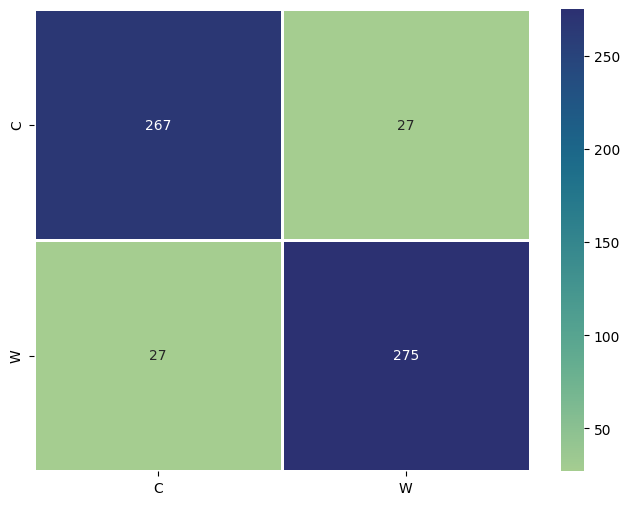

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

results = []
evaluate_model("RF", best_random_forest_model, results)
sklearn_eval = print_results(results)
rf_confusion_matrix = sklearn_eval["Confusion Matrix"].values[0]
confusion_matrix_df = pd.DataFrame(rf_confusion_matrix, index=["C", "W"], columns=["C", "W"])

fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt='g', cmap="crest");